In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('breast-cancer.csv')
X=df.drop('diagnosis',axis=1)
y=df['diagnosis'].map({'M':1,'B':0})
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
linear_pred=svm_linear.predict(X_test)
acc_linear=accuracy_score(y_test,linear_pred)
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train)
rbf_pred=svm_rbf.predict(X_test)
acc_rbf=accuracy_score(y_test,rbf_pred)
acc_linear*100,acc_rbf*100


(95.6140350877193, 98.24561403508771)

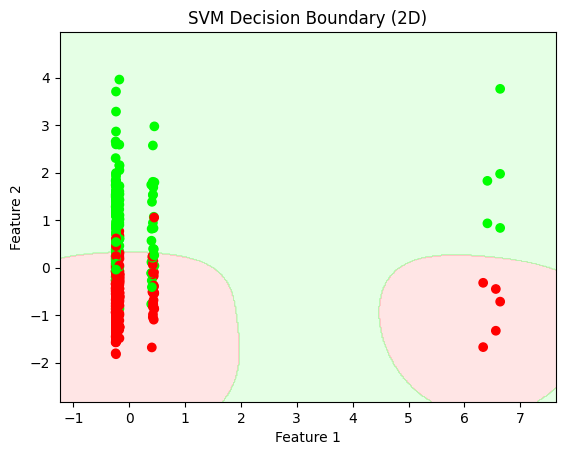

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_2d=X_train[:,:2]
y_2d=y_train
svm2d=SVC(kernel='rbf',gamma=0.5,C=1).fit(X_2d,y_2d)
x_min,x_max=X_2d[:,0].min()-1,X_2d[:,0].max()+1
y_min,y_max=X_2d[:,1].min()-1,X_2d[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
Z=svm2d.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.3,cmap=ListedColormap(['#FFAAAA','#AAFFAA']))
plt.scatter(X_2d[:,0],X_2d[:,1],c=y_2d,cmap=ListedColormap(['#FF0000','#00FF00']))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary (2D)')
plt.show()


In [7]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=0,cv=5)
grid.fit(X_train,y_train)
grid.best_params_,grid.best_score_

({'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}, np.float64(0.9736263736263737))

In [8]:
from sklearn.model_selection import cross_val_score
svm_best=SVC(kernel='rbf',C=grid.best_params_['C'],gamma=grid.best_params_['gamma'])
scores=cross_val_score(svm_best,X,y,cv=5)
scores.mean()

np.float64(0.6274181027790716)